In [129]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from auxiliary import load_pickle
%matplotlib inline

sns.set_theme()

In [90]:
PATH='./results/TestSuite-06_07_2021-12_38_38'

In [91]:
data = load_pickle(PATH)

In [92]:
data

[{'task': 'MNIST',
  'graph': 'FullyConnectedGraph',
  'nr_classes': 0,
  'nr_nodes': 8,
  'training_epochs': 301,
  'epoch_list': [0, 50, 100, 150, 200, 250, 300],
  'node_0': {'lr': 0.001,
   'alpha': 0.5,
   'test_accuracies': [0.0832, 0.3112, 0.4632, 0.5152, 0.564, 0.6024, 0.6152],
   'test_losses': [2.440401554107666,
    2.2413716316223145,
    2.1804327964782715,
    2.1274473667144775,
    2.0744235515594482,
    2.011397361755371,
    1.9456946849822998],
   'sent_bytes': [784, 39984, 79184, 118384, 157584, 196784, 235984],
   'received_bytes': [784, 39984, 79184, 118384, 157584, 196784, 235984]},
  'node_1': {'lr': 0.001,
   'alpha': 0.5,
   'test_accuracies': [0.1696, 0.3088, 0.4544, 0.5008, 0.5408, 0.5832, 0.6],
   'test_losses': [2.2628746032714844,
    2.241915702819824,
    2.184861421585083,
    2.131517171859741,
    2.079845666885376,
    2.018151044845581,
    1.9544494152069092],
   'sent_bytes': [784, 39984, 79184, 118384, 157584, 196784, 235984],
   'received_byte

In [93]:
def get_top1_accuracy(results):
    nr_nodes = results['nr_nodes']
    top_acc_list = []
    for i in range(nr_nodes):
        node_dict = results[f'node_{i}']
        top_acc_list.append(max(node_dict['test_accuracies']))

    return top_acc_list, sum(top_acc_list)/len(top_acc_list)

In [94]:
def get_top1_per_epoch(results):
    nr_nodes = results['nr_nodes']
    top_acc_list = []
    for i in range(nr_nodes):
        node_dict = results[f'node_{i}']
        top_acc_list.append(node_dict['test_accuracies'])
    transpose = list(zip(*top_acc_list))
    return [max(node) for node in transpose]

In [95]:
get_top1_per_epoch(data[0])

[0.196, 0.368, 0.5224, 0.5712, 0.6552, 0.6688, 0.7112]

In [96]:
save = []
for run in data2:
    _, avg = get_top1_accuracy(run)
    save.append(avg)

In [97]:
save

[0.6732999999999999, 0.6391000000000001, 0.6248079995084785]

In [110]:
data

[{'task': 'MNIST',
  'graph': 'FullyConnectedGraph',
  'nr_classes': 0,
  'nr_nodes': 8,
  'training_epochs': 301,
  'epoch_list': [0, 50, 100, 150, 200, 250, 300],
  'node_0': {'lr': 0.001,
   'alpha': 0.5,
   'test_accuracies': [0.0832, 0.3112, 0.4632, 0.5152, 0.564, 0.6024, 0.6152],
   'test_losses': [2.440401554107666,
    2.2413716316223145,
    2.1804327964782715,
    2.1274473667144775,
    2.0744235515594482,
    2.011397361755371,
    1.9456946849822998],
   'sent_bytes': [784, 39984, 79184, 118384, 157584, 196784, 235984],
   'received_bytes': [784, 39984, 79184, 118384, 157584, 196784, 235984]},
  'node_1': {'lr': 0.001,
   'alpha': 0.5,
   'test_accuracies': [0.1696, 0.3088, 0.4544, 0.5008, 0.5408, 0.5832, 0.6],
   'test_losses': [2.2628746032714844,
    2.241915702819824,
    2.184861421585083,
    2.131517171859741,
    2.079845666885376,
    2.018151044845581,
    1.9544494152069092],
   'sent_bytes': [784, 39984, 79184, 118384, 157584, 196784, 235984],
   'received_byte

In [122]:
def graph_top1_epochs(results):
    f, ax = plt.subplots(1, 1)
    for run in results:
        ax = sns.lineplot(x = run['epoch_list'],y = get_top1_per_epoch(run), label=f"{run['nr_nodes']} Nodes")
    ax.legend()
    plt.title('')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

In [126]:
def graph_top1_bytes(results):
    f, ax = plt.subplots(1, 1)
    for run in results:
        ax = sns.lineplot(x = run['node_0']['sent_bytes'],y = get_top1_per_epoch(run), label=f"{run['nr_nodes']} Nodes")
    ax.legend()
    plt.xlabel('Bytes')
    plt.ylabel('Accuracy')

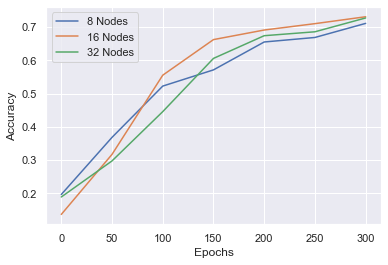

In [127]:
graph_top1_epochs(data)

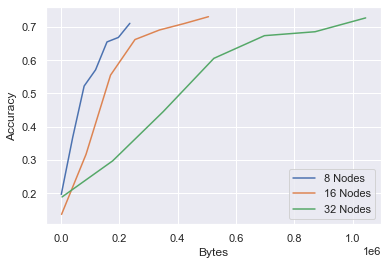

In [128]:
graph_top1_bytes(data)